In [1]:
import nest
import network
import addons
import numpy as np
from network_params import net_dict
import network_params
from sim_params import sim_dict
from stimulus_params import stim_dict
from scipy.signal import argrelextrema


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Apr 15 2024 07:21:32

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



/home/hyc_1/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning:Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.


Initialize the network with simulation, network and stimulation parameters, then create and connect all nodes, and finally simulate. The times for a presimulation and the main simulation are taken independently. A presimulation is useful because the spike activity typically exhibits a startup transient. In benchmark simulations, this transient should be excluded from a time measurement of the state propagation phase. Besides, statistical measures of the spike activity should only be computed after the transient has passed.

In [2]:
def filter_signal(data,fs,lowcut,highcut,order=3):

    return addons.butter_bandpass_filter(data,lowcut,highcut,fs,order)

In [3]:
import math 
from scipy.fftpack import *

def hilbert_transform(signal):
    '''
    N : fft length
    M : number of elements to zero out
    U : DFT of signal
    V: IDFT of H(U) 
    '''

    N = len(signal)
    #take the forward Fourier transform
    U = fft(signal)
    M = N - N//2 - 1
    #Zero out negative frequency components
    U[N//2+1:] = [0] * M 
    #double fft energy except #DC0
    U[1:N//2] = 2 * U[1:N//2]
    #take inverse of Fourier transform
    v = ifft(U)
    return v 

Data will be written to: stimulation/data_pulse_packet_example/
  Directory already existed. Old data will be overwritten.


RNG seed: 55
Total number of virtual processes: 10
Creating neuronal populations.

Mar 04 17:18:01 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.
Creating recording devices.
  Creating spike recorders.
  Creating voltmeters.
Creating Poisson generators for background input.
Creating external input for external stimulation.
Connecting neuronal populations recurrently.
NodeCollection(metadata=None, model=iaf_psc_exp, size=20683, first=1, last=20683)
NodeCollection(metadata=None, model=iaf_psc_exp, size=5834, first=20684, last=26517)
NodeCollection(metadata=None, model=iaf_psc_exp, size=21915, first=26518, last=48432)
NodeCollection(metadata=None, model=iaf_psc_exp, size=5479, first=48433, last=53911)
NodeCollection(metadata=None, model=iaf_psc_exp, size=4850, first=53912, last=58761)
NodeCollection(metadata=None, model=ia

'\n\npop_signal_gamma = {}\nphase = {}\nphase_times = {}\namplitude = {}\namplitude_times = {}\nphase_delay = {}\n\n\nfor i in range(len(pop_activity)):\n    pop_signal_gamma[i] = filter_signal(pop_activity[i],fs=1000,lowcut=lowcut_gamma,highcut=highcut_gamma)\n\n\npop_activity_hilbert = {}\nfor i in range(len(pop_activity)):\n    pop_activity_hilbert[i] = hilbert_transform(pop_signal_gamma[i])\n    phase[i] = np.angle(pop_activity_hilbert[i][stim_time_index::])\n    phase_times = times_a[i][stim_time_index+1::]\n\n    mins_phase = argrelextrema(phase_times, np.less)\n    phase_delay[i] = times_test[mins_phase[0][3]]\n    period[i] = \n\n\n    amplitude[i] = np.abs(pop_activity_hilbert[i][stim_time_end::])\n    amplitude_times[i] = times_a[i][stim_time_end+1::]\n\n'

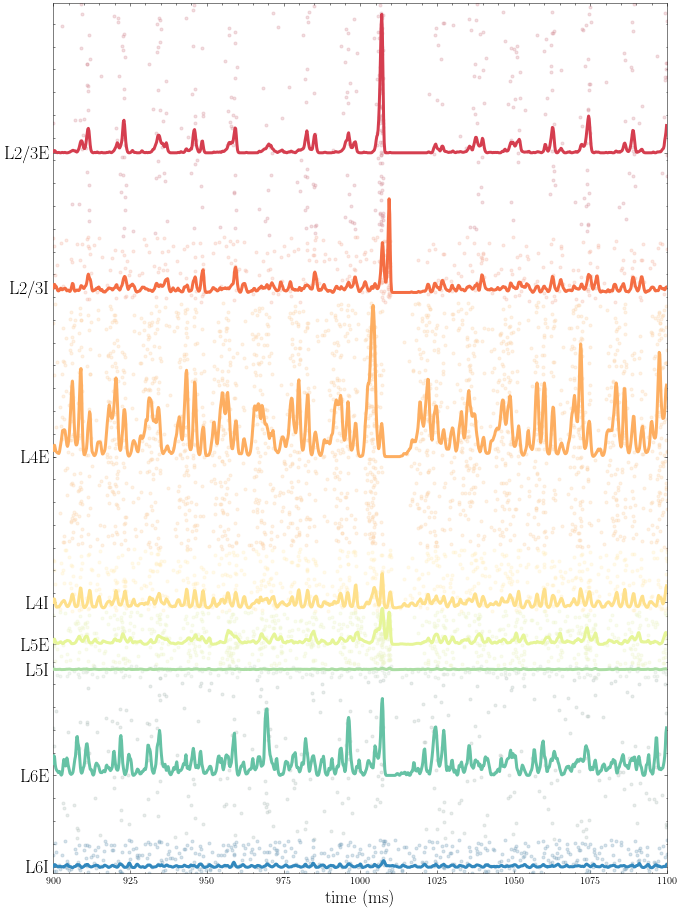

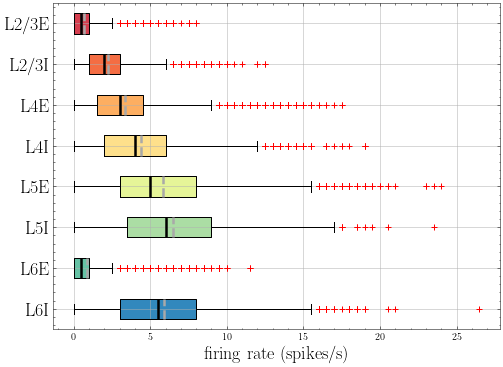

In [4]:

#General parameters
lowcut_gamma = 50
highcut_gamma = 95


stim_times = np.array([ 998.4,  998.6,  998.8,  999. ,  999.2,  999.4,  999.6,  999.8, 1000. , 1000.2, 1000.4, 1000.6, 1000.8, 1001. , 1001.2])
stim_phases = np.array([-2.98479532, -2.51645052, -2.05010853, -1.5864665 , -1.12619071,-0.66997717, -0.21834369,  0.22859127,  0.67100583,  1.10917755, 1.54340655,  1.97406281,  2.40157844,  2.8262626 , -3.03527371])



#stimulation parameters
target_population = [3]
stim_time_index = 490
stim_time_end = 530

#FIRST, a run without stimulation
net = network.Network(sim_dict, net_dict, stim_dict, path = "stimulation/data_pulse_packet_example/")
net.create()
net.connect()

#data_synapses = addons.number_synapses(net.pops)

net.simulate(sim_dict["t_presim"])
net.simulate(sim_dict["t_sim"])
raster_plot_interval = np.array([900, 1100])
firing_rates_interval = np.array([500,2500])

pop_activity, times_a = net.evaluate(raster_plot_interval, firing_rates_interval,binned=True)
'''

pop_signal_gamma = {}
phase = {}
phase_times = {}
amplitude = {}
amplitude_times = {}
phase_delay = {}


for i in range(len(pop_activity)):
    pop_signal_gamma[i] = filter_signal(pop_activity[i],fs=1000,lowcut=lowcut_gamma,highcut=highcut_gamma)


pop_activity_hilbert = {}
for i in range(len(pop_activity)):
    pop_activity_hilbert[i] = hilbert_transform(pop_signal_gamma[i])
    phase[i] = np.angle(pop_activity_hilbert[i][stim_time_index::])
    phase_times = times_a[i][stim_time_index+1::]

    mins_phase = argrelextrema(phase_times, np.less)
    phase_delay[i] = times_test[mins_phase[0][3]]
    period[i] = 


    amplitude[i] = np.abs(pop_activity_hilbert[i][stim_time_end::])
    amplitude_times[i] = times_a[i][stim_time_end+1::]

'''


